In [1]:
import PIL

In [2]:
PIL.__version__

'9.4.0'

In [3]:
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsImagePlugin
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    Im

In [4]:
dir(PIL)

['ExifTags',
 'GimpGradientFile',
 'GimpPaletteFile',
 'Image',
 'ImageChops',
 'ImageColor',
 'ImageFile',
 'ImageMode',
 'ImagePalette',
 'ImageSequence',
 'PaletteFile',
 'PngImagePlugin',
 'TiffTags',
 'UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_deprecate',
 '_imaging',
 '_plugins',
 '_util']

In [5]:
from PIL import Image

In [6]:
file="sample.jpg"
image =Image.open(file)
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x540 at 0x7D98DA615FC0>


This returns us a kind of PIL.GifImagePlugin.GifImageFile. At first this might seem a bit confusing, since because we were told by the docs that we should be exepcting a PIL.Image.Image object back. But this is just object inheritance working! In fact, the object
returned is both an Image and a GifImageFile. We can use the python inspect module to see this as the getmro function will return a list of all of the classes that are being inherited by a given object.

In [7]:
import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

The type of the image is <class 'PIL.JpegImagePlugin.JpegImageFile'>


(PIL.JpegImagePlugin.JpegImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [8]:
image.show()

In [9]:
# scaling_factor = 0.5
# new_size = (int(image_raw.width * scaling_factor), int(image_raw.height * scaling_factor))
# image = image_raw.resize(new_size)

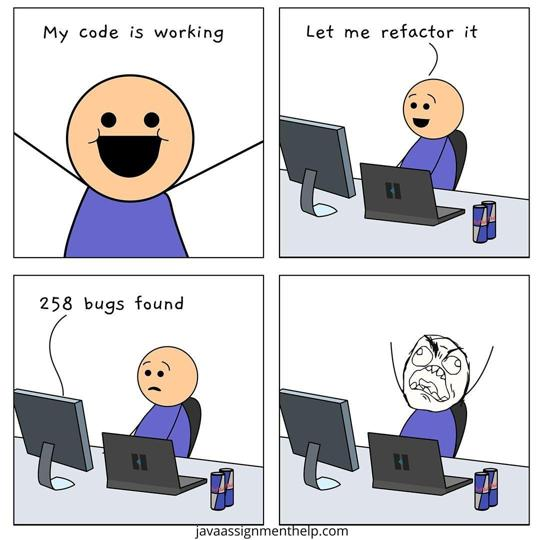

In [10]:
from IPython.display import display
display(image)

The Jupyter environment is running a special wrapper around the Python interpretor, called IPython. IPython allows the kernel back end to communicate with a browser front end, among other things. The IPython package has a display function which can take objects and use custom formatters in order to render them. A number of formatters are provided by default, including one which knows how to handle image types.

**Common Functions in the Python Imaging Library**

In [11]:
import PIL
from PIL import Image
from IPython.display import display

file="sample.jpg"
image=Image.open(file)

In [12]:
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.JpegImagePlugin.JpegImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [13]:
help(image.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.JpegImagePlugin.JpegImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename e

The save method has a couple of parameters.
The first, called fp, is the filename we want to save the object too.
The second, format, it allows us to change the type of the image, but the docs tell us that this should be done automatically by looking at the file extension as well.

In [14]:
#  this file was originally a jpg, but if we save it with a .png format and read it in again we'll get a different kind of file.

image.save("sample.png")
image=Image.open("sample.png")
import inspect
inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

The PILLOW/PIL library also has some nice image filters to add some effects. It does this through the filter() function. The filter() function takes a Filter object, and those are all stored in the ImageFilter object.

In [15]:
from PIL import ImageFilter
#help(ImageFilter)

# List all attributes of the ImageFilter module
attributes = dir(ImageFilter)

# Filter out only classes (attributes starting with an uppercase letter)
filters = [attr for attr in attributes if attr[0].isupper()]

# Print the list of filters in list view
for filter_class in filters:
    print(filter_class)

BLUR
BoxBlur
BuiltinFilter
CONTOUR
Color3DLUT
DETAIL
EDGE_ENHANCE
EDGE_ENHANCE_MORE
EMBOSS
FIND_EDGES
Filter
GaussianBlur
Kernel
MaxFilter
MedianFilter
MinFilter
ModeFilter
MultibandFilter
RankFilter
SHARPEN
SMOOTH
SMOOTH_MORE
UnsharpMask


**Blur Filter**

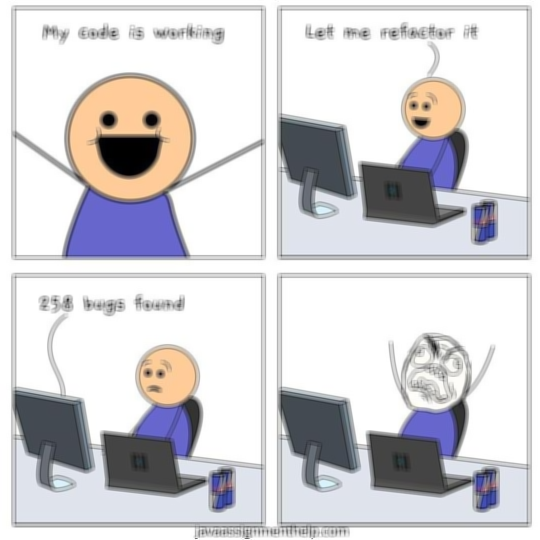

In [17]:
# Before do this we have to convert the image to RGB mode.
image=image.convert('RGB')
blurred_image=image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

**Crop Image**

In [18]:
print("{}x{}".format(image.width, image.height))

540x540


In [19]:
help(image.crop)

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



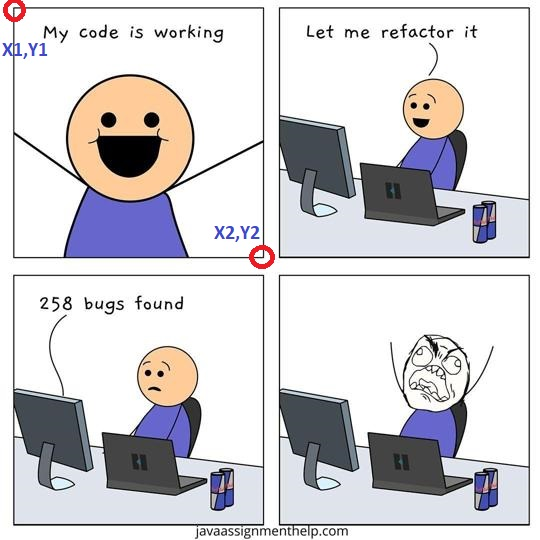

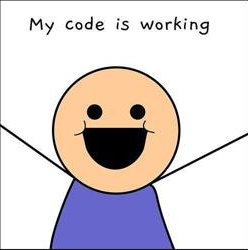

In [24]:
# display(image.crop((X1,Y1,X2,Y2)))
display(image.crop((14,8,262,258)))

**Additional PILLOW functions**

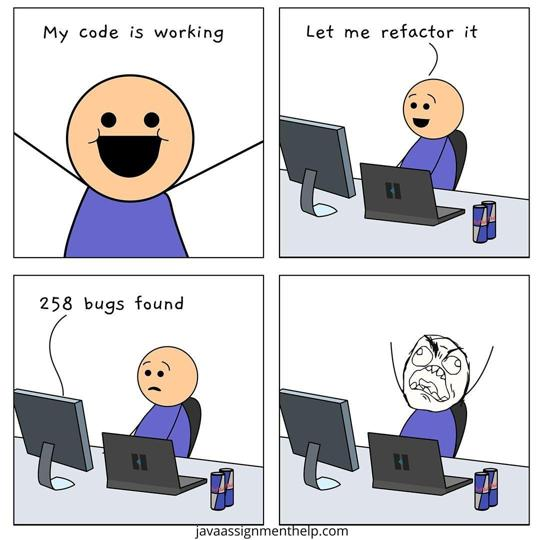

In [26]:
import PIL
from PIL import Image
from IPython.display import display


file="sample.jpg"
image=Image.open(file).convert('RGB')

display(image)

Scenario 1

A task that is fairly common in image and picture manipulation is to create contact sheets of images.
A contact sheet is one image that actually contains several other different images. Lets try and make a contact sheet for the image. In particular, lets change the brightness of the image in ten different ways, then scale the image down smaller, and put them side by side so we can get the sense of which brightness we might want to use.

it takes a value between 0.0 (a completely black image) and 1.0 (the original image) to adjust the brightness. All of the classes in the ImageEnhance module do this the same way.

In [27]:
from PIL import ImageEnhance

enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
  images.append(enhancer.enhance(i/10))

print(images)

[<PIL.Image.Image image mode=RGB size=540x540 at 0x7D98DA616830>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98DA697700>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AC520>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AC160>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AFDF0>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AC400>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AD480>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AD990>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AFAC0>, <PIL.Image.Image image mode=RGB size=540x540 at 0x7D98D85AFCD0>]


In [28]:
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



In [29]:
first_image=images[0]
from PIL import Image

contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

So now we have a black image that's ten times the size of the other images in the contact_sheet variable. Now lets just loop through the image list and paste() the results in. The paste() function will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y) offset for that image. In our case, the x position is always 0, but the y location will change by 450 pixels each time we iterate through the loop.
Lets first create a counter variable for the y location. It will start at zero.

In [30]:
current_location = 0
for img in images:
    # Paste the current image into the contact sheet
    contact_sheet.paste(img, (0, current_location) )
    # Update the current_location counter
    current_location=current_location+450

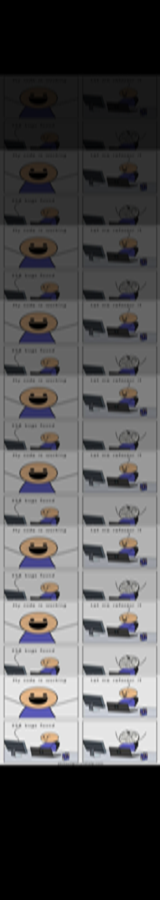

In [38]:
# This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet for display. We can do
# this using the resize() function. This function just takes a tuple of width and height, and we'll resize
# everything down to the size of just two individual images

contact_sheet = contact_sheet.resize((160,900))
# Now lets just display that composite image
display(contact_sheet)

That's a nice proof of concept. But it's a little tough to see. Lets instead change this to a three by three grid of values. First thing do is make canvas, and make it 3 times the width of image and 3 times the height of our image - a nine image square.

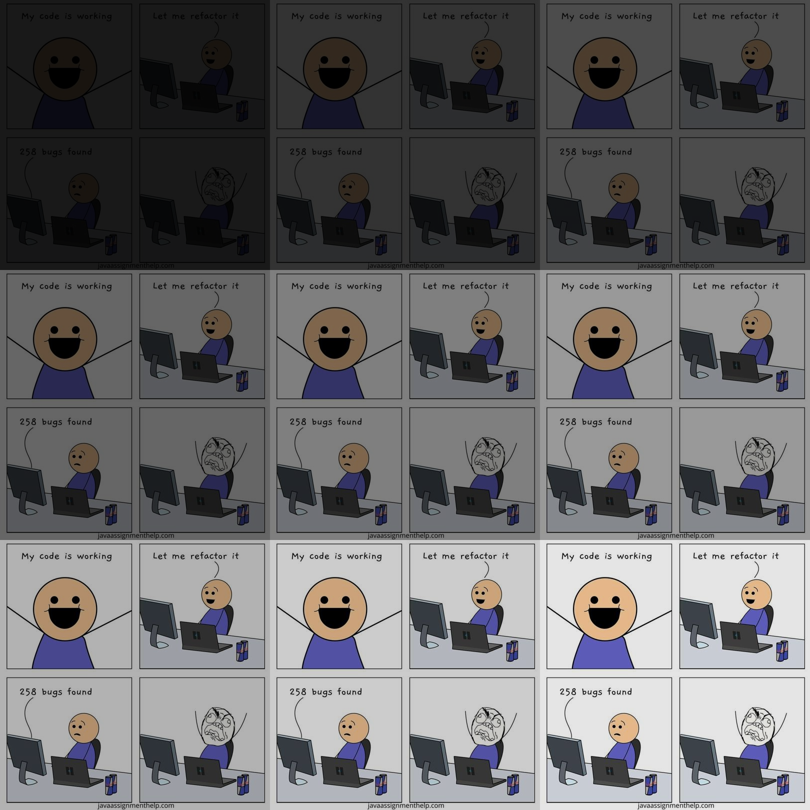

In [39]:
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))

# Now we want to iterate over our images and place them into this grid. Remember that in PIL we manage the
# location of where we refer to as an image in the upper right hand corner, so this will be 0,0. Lets use
# one variable for the X dimension, and one for the Y dimension.
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black. Instead we want to just deal with the images after the first one, and that should
# give us nine in total
for img in images[1:]:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# Now lets resize the contact sheet. We'll just make it half the size by dividing it by two. And, because
# the resize function needs to take round numbers, we need to convert our divisions from floating point
# numbers into integers using the int() function.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
# Now lets display that composite image
display(contact_sheet)